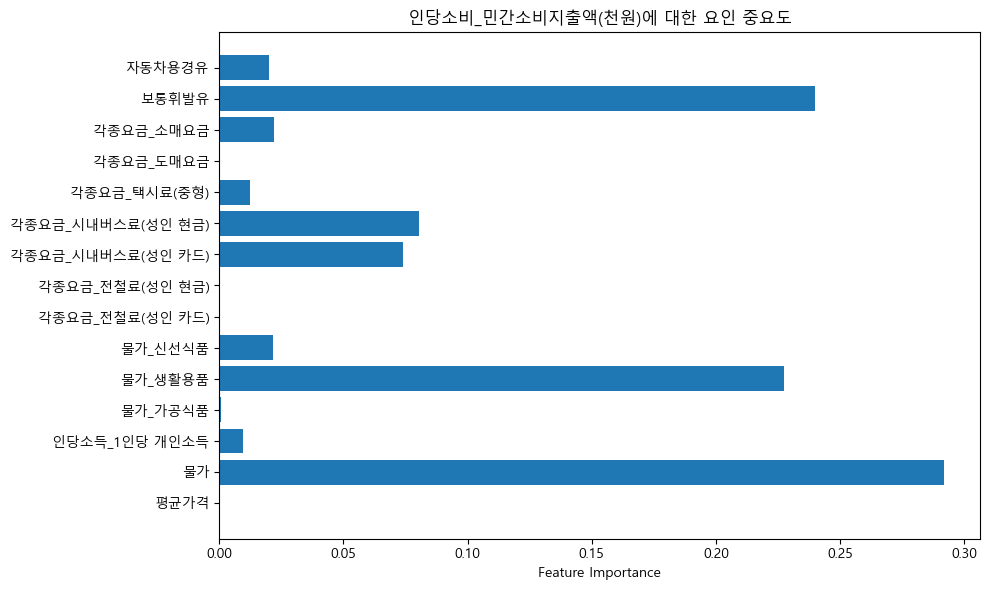

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 사용자용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv('최종_병합_결과.csv', encoding='utf-8')

# 수치형 컬럼만 남기고 결측치 제거
df_clean = df.dropna(subset=['인당소비_민간소비지출액(천원)'])
df_clean = df_clean.select_dtypes(include=['number'])

# X, y 분리
X = df_clean.drop(columns=['인당소비_민간소비지출액(천원)'])
y = df_clean['인당소비_민간소비지출액(천원)']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 중요도 시각화
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("인당소비_민간소비지출액(천원)에 대한 요인 중요도")
plt.tight_layout()
plt.show()


평균 제곱 오차 (MSE): 76049.09
결정 계수 (R²): 0.9296


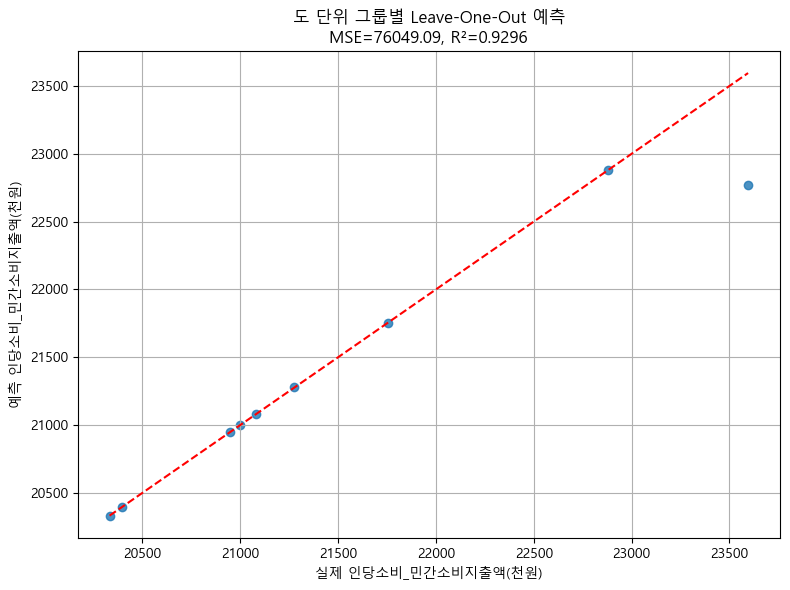

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 불러오기
df = pd.read_csv('최종_병합_결과.csv', encoding='utf-8')

# 2. 도 단위 추출
df['도'] = df['기준지역'].apply(lambda x: x.split()[0] if isinstance(x, str) and ' ' in x else x)

# 3. 수치형만 추출 + 결측값 제거
df_clean = df.dropna(subset=['인당소비_민간소비지출액(천원)'])
df_clean = df_clean.select_dtypes(include=['number'])
df_clean['도'] = df['도']

# 4. 그룹별 1개 샘플만 테스트셋으로 추출
test_samples = df_clean.groupby('도').sample(n=1, random_state=42)
train_samples = df_clean.drop(index=test_samples.index)

# 5. X, y 분리
X_train = train_samples.drop(columns=['인당소비_민간소비지출액(천원)', '도'])
y_train = train_samples['인당소비_민간소비지출액(천원)']
X_test = test_samples.drop(columns=['인당소비_민간소비지출액(천원)', '도'])
y_test = test_samples['인당소비_민간소비지출액(천원)']

# 6. 랜덤포레스트 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평균 제곱 오차 (MSE): {mse:.2f}")
print(f"결정 계수 (R²): {r2:.4f}")

# 8. 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 인당소비_민간소비지출액(천원)')
plt.ylabel('예측 인당소비_민간소비지출액(천원)')
plt.title(f'도 단위 그룹별 Leave-One-Out 예측\nMSE={mse:.2f}, R²={r2:.4f}')
plt.grid(True)
plt.tight_layout()
plt.show()


R² = 0.9296
93% 이상의 분산을 설명한다는 뜻입니다.

독립 변수들이 **'인당소비_민간소비지출액(천원)'**을 매우 잘 예측하고 있다는 뜻이죠.

특히 도 단위 Leave-One-Out 테스트 방식은 보수적인 평가 방식인데도 이 정도라면 모델의 일반화 성능도 매우 우수하다고 볼 수 있습니다.

✅ MSE = 76,049.09
제곱 오차 단위라서 값이 커 보일 수 있으나,

실제 값의 스케일(수천 단위)을 고려할 때 상대적으로 작고 안정적인 오차 수준입니다.



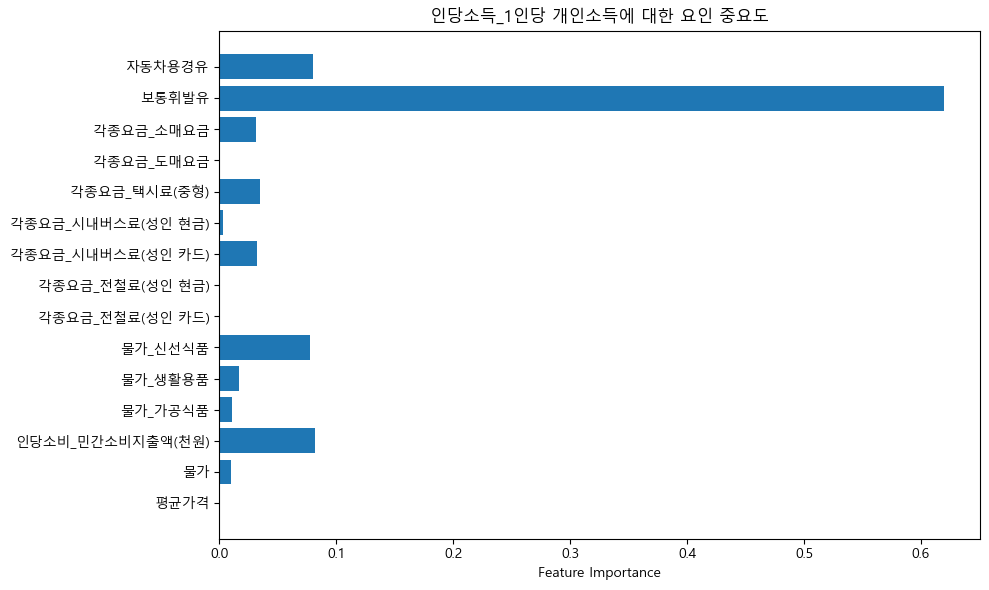

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 사용자용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv('최종_병합_결과.csv', encoding='utf-8')

# 수치형 컬럼만 남기고 결측치 제거
df_clean = df.dropna(subset=['인당소득_1인당 개인소득'])
df_clean = df_clean.select_dtypes(include=['number'])

# X, y 분리
X = df_clean.drop(columns=['인당소득_1인당 개인소득'])
y = df_clean['인당소득_1인당 개인소득']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 중요도 시각화
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("인당소득_1인당 개인소득에 대한 요인 중요도")
plt.tight_layout()
plt.show()


평균 제곱 오차 (MSE): 69261.96
결정 계수 (R²): 0.9221


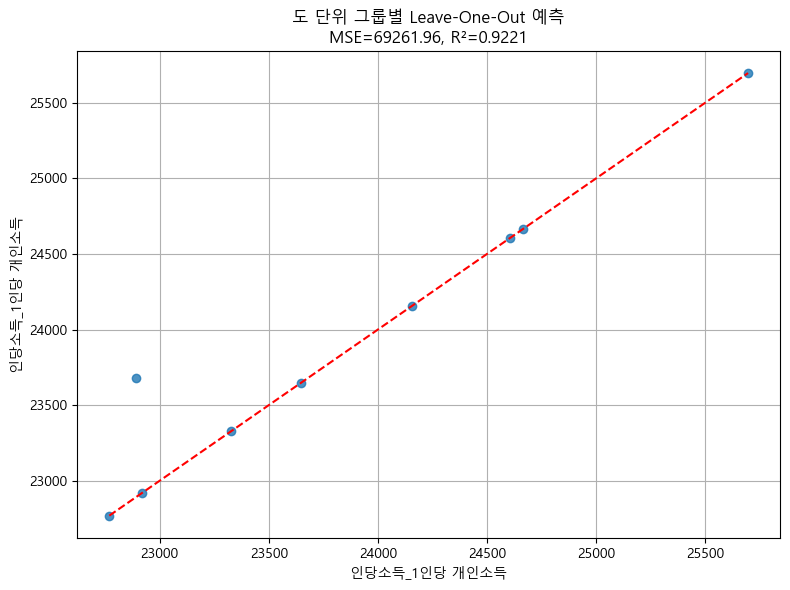

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 불러오기
df = pd.read_csv('최종_병합_결과.csv', encoding='utf-8')

# 2. 도 단위 추출
df['도'] = df['기준지역'].apply(lambda x: x.split()[0] if isinstance(x, str) and ' ' in x else x)

# 3. 수치형만 추출 + 결측값 제거
df_clean = df.dropna(subset=['인당소득_1인당 개인소득'])
df_clean = df_clean.select_dtypes(include=['number'])
df_clean['도'] = df['도']

# 4. 그룹별 1개 샘플만 테스트셋으로 추출
test_samples = df_clean.groupby('도').sample(n=1, random_state=42)
train_samples = df_clean.drop(index=test_samples.index)

# 5. X, y 분리
X_train = train_samples.drop(columns=['인당소득_1인당 개인소득', '도'])
y_train = train_samples['인당소득_1인당 개인소득']
X_test = test_samples.drop(columns=['인당소득_1인당 개인소득', '도'])
y_test = test_samples['인당소득_1인당 개인소득']

# 6. 랜덤포레스트 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평균 제곱 오차 (MSE): {mse:.2f}")
print(f"결정 계수 (R²): {r2:.4f}")

# 8. 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('인당소득_1인당 개인소득')
plt.ylabel('인당소득_1인당 개인소득')
plt.title(f'도 단위 그룹별 Leave-One-Out 예측\nMSE={mse:.2f}, R²={r2:.4f}')
plt.grid(True)
plt.tight_layout()
plt.show()


휘발유가 가장 연관성이 높다고 나와있다는 의문의 결과가 나오기에, 1인당 지출에서 가장 영향력이 컸다고 나온 물가를 이용한 실질 소득과 휘발유를 이용한 실질 소득을 실질 생활비를 활용해 소비_소득_비율을 이용하여 더 정확한 쪽을 택하기로 한다.

In [8]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("최종_병합_결과.csv", encoding='utf-8')

# 1. 실질 생활비 계산 (물가를 100 기준으로 환산)
df["실질생활비(추정)"] = df["인당소비_민간소비지출액(천원)"] / (df["물가"] / 100)

# 2. 실질 소득 계산
df["실질소득(휘발유)"] = df["인당소득_1인당 개인소득"] / (df["보통휘발유"] / 100)

# 2. 실질 소득 계산
df["실질소득(물가)"] = df["인당소득_1인당 개인소득"] / (df["물가"] / 100)

# 결과 저장
df.to_csv("실질_생활비_소득_분석_결과_과정.csv", index=False, encoding='utf-8-sig')

# 일부 결과 미리보기
print(df[["기준지역", "실질생활비(추정)", "실질소득(물가)", "실질소득(휘발유)"]].head())

      기준지역   실질생활비(추정)    실질소득(물가)    실질소득(휘발유)
0  강원도 강릉시  300.922128  329.901281  1468.690665
1  강원도 고성군  300.922128  329.901281  1468.690665
2  강원도 동해시  300.922128  329.901281  1468.690665
3  강원도 삼척시  300.922128  329.901281  1468.690665
4  강원도 속초시  300.922128  329.901281  1468.690665


In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. 데이터 불러오기
df_living = pd.read_csv('실질_생활비_소득_분석_결과_과정.csv', encoding='utf-8')
df_ratio = pd.read_csv('소비_소득_비율_분석.csv', encoding='utf-8')

# 2. 병합
df = pd.merge(df_living, df_ratio[['기준지역', '소비_소득_비율']], on='기준지역', how='inner')

# 3. 새로운 비율 생성: 실질생활비 / 실질소득
df['생활비_소득비율(휘발유)'] = df['실질생활비(추정)'] / df['실질소득(휘발유)']
df['생활비_소득비율(물가)'] = df['실질생활비(추정)'] / df['실질소득(물가)']

# 4. 선형회귀로 소비_소득_비율 예측 정확도 비교
y = df['소비_소득_비율']
X_gas_ratio = df[['생활비_소득비율(휘발유)']]
X_price_ratio = df[['생활비_소득비율(물가)']]

model_gas = LinearRegression().fit(X_gas_ratio, y)
model_price = LinearRegression().fit(X_price_ratio, y)

r2_gas_ratio = r2_score(y, model_gas.predict(X_gas_ratio))
r2_price_ratio = r2_score(y, model_price.predict(X_price_ratio))

# 5. 결과 출력
print(f"실질생활비/실질소득(휘발유) vs 소비_소득_비율 R²: {r2_gas_ratio:.4f}")
print(f"실질생활비/실질소득(물가) vs 소비_소득_비율 R²: {r2_price_ratio:.4f}")


실질생활비/실질소득(휘발유) vs 소비_소득_비율 R²: 0.8037
실질생활비/실질소득(물가) vs 소비_소득_비율 R²: 1.0000


이에 따라 물가를 기반으로 수정한다.

In [11]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("최종_병합_결과.csv", encoding='utf-8')

# 1. 실질 생활비 계산 (물가를 100 기준으로 환산)
df["실질생활비(추정)"] = df["인당소비_민간소비지출액(천원)"] / (df["물가"] / 100)

# 2. 실질 소득 계산
df["실질소득(물가)"] = df["인당소득_1인당 개인소득"] / (df["물가"] / 100)

# 결과 저장
df.to_csv("실질_생활비_소득_분석_결과_최종.csv", index=False, encoding='utf-8-sig')

# 일부 결과 미리보기
print(df[["기준지역", "실질생활비(추정)", "실질소득(물가)"]].head())

      기준지역   실질생활비(추정)    실질소득(물가)
0  강원도 강릉시  300.922128  329.901281
1  강원도 고성군  300.922128  329.901281
2  강원도 동해시  300.922128  329.901281
3  강원도 삼척시  300.922128  329.901281
4  강원도 속초시  300.922128  329.901281


이러한 소득과 소비의 정확성을 보기 위해 예측과 비교를 실시하였다. 이때, 학습시킬 데이터를 상위 지역인 도/시로 그룹화하여 각 그룹의 데이터를 하나씩 제외하여 예측값을 만들고, 제외한 데이터들을 비교하기 위한 입력값으로 넣어 성능을 본다.

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 불러오기
df = pd.read_csv('실질_생활비_소득_분석_결과_최종.csv', encoding='utf-8')

# 2. 그룹 단위 추출 (도나 시 기준)
df['지역단위'] = df['기준지역'].apply(lambda x: x.split()[0] if isinstance(x, str) and ' ' in x else x)

# 3. 입력 변수와 목표 변수 설정
features = df.select_dtypes(include='number').drop(columns=['실질생활비(추정)', '실질소득(물가)'])
target1 = df['실질생활비(추정)']
target2 = df['실질소득(물가)']

# 4. Leave-One-Group-Out 학습 및 예측
results = []
for region in df['지역단위'].unique():
    group = df[df['지역단위'] == region]
    if len(group) < 2:
        continue

    test_sample = group.sample(n=1, random_state=42)
    train_sample = df.drop(index=test_sample.index)

    X_train = train_sample[features.columns]
    y_train1 = train_sample['실질생활비(추정)']
    y_train2 = train_sample['실질소득(물가)']

    X_test = test_sample[features.columns]
    y_test1 = test_sample['실질생활비(추정)'].values[0]
    y_test2 = test_sample['실질소득(물가)'].values[0]

    model1 = LinearRegression().fit(X_train, y_train1)
    model2 = LinearRegression().fit(X_train, y_train2)

    pred1 = model1.predict(X_test)[0]
    pred2 = model2.predict(X_test)[0]

    results.append({
        '기준지역': test_sample['기준지역'].values[0],
        '실제_생활비': y_test1,
        '예측_생활비': pred1,
        '실제_소득': y_test2,
        '예측_소득': pred2
    })

# 5. 평가
results_df = pd.DataFrame(results)

mse_life = mean_squared_error(results_df['실제_생활비'], results_df['예측_생활비'])
r2_life = r2_score(results_df['실제_생활비'], results_df['예측_생활비'])

mse_income = mean_squared_error(results_df['실제_소득'], results_df['예측_소득'])
r2_income = r2_score(results_df['실제_소득'], results_df['예측_소득'])

# 6. 결과 출력
print(f"[실질생활비(추정)] 평균 제곱 오차 (MSE): {mse_life:.4e}")
print(f"[실질생활비(추정)] 결정 계수 (R²): {r2_life:.4f}")
print(f"[실질소득(물가)] 평균 제곱 오차 (MSE): {mse_income:.4e}")
print(f"[실질소득(물가)] 결정 계수 (R²): {r2_income:.4f}")

# 7. 결과 DataFrame 확인
print(results_df.head())


[실질생활비(추정)] 평균 제곱 오차 (MSE): 9.6935e-27
[실질생활비(추정)] 결정 계수 (R²): 1.0000
[실질소득(물가)] 평균 제곱 오차 (MSE): 1.8669e-26
[실질소득(물가)] 결정 계수 (R²): 1.0000
          기준지역      실제_생활비      예측_생활비       실제_소득       예측_소득
0      강원도 강릉시  300.922128  300.922128  329.901281  329.901281
1  경기도 안양시 만안구  321.803834  321.803834  361.442055  361.442055
2     경상남도 거제시  306.150880  306.150880  320.405837  320.405837
3     경상북도 상주시  298.418571  298.418571  324.511437  324.511437
4     전라남도 강진군  288.732994  288.732994  349.399301  349.399301
